## Earthquake Hotspot Clustering

In [1]:
import pandas as pd


In [16]:
eq = pd.read_csv("Dataset\phivolcs_earthquake_data.csv")

In [3]:
eq.head(5)

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location
0,2025-03-31 23:32:00,06.78,125.67,016,2.2,028 km S 78° E of Santa Cruz (Davao Del Sur)
1,2025-03-31 23:07:00,09.75,122.28,026,2.1,017 km S 81° W of City Of Sipalay (Negros Occi...
2,2025-03-31 22:35:00,09.70,122.28,025,1.9,019 km S 64° W of City Of Sipalay (Negros Occi...
3,2025-03-31 22:17:00,13.73,120.74,075,2.2,017 km S 46° E of Calatagan (Batangas)
4,2025-03-31 21:38:00,08.60,127.11,030,1.8,089 km N 73° E of Hinatuan (Surigao Del Sur)


In [4]:
eq.describe()

,Magnitude
count,100848.000000
mean,2.538062
std,0.697510
min,1.000000
25%,2.000000
50%,2.400000
75%,2.900000
max,7.500000


In [5]:
eq.isnull().sum()

Date_Time_PH    0
Latitude        0
Longitude       0
Depth_In_Km     1
Magnitude       0
Location        0
dtype: int64

In [6]:
# removing null values in Depth column
eq.dropna(axis=0, inplace=True)
eq.isnull().sum()

Date_Time_PH    0
Latitude        0
Longitude       0
Depth_In_Km     0
Magnitude       0
Location        0
dtype: int64

### Data Cleaning

In [17]:
#separate the distance and place from the Location column
split_location = eq['Location'].str.split(' of ', n=1, expand=True)
eq['Distance'] = split_location[0]
eq['Place'] = split_location[1]

In [8]:
eq.head(5)

,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location,Distance,Place
0,2025-03-31 23:32:00,06.78,125.67,016,2.2,028 km S 78° E of Santa Cruz (Davao Del Sur),028 km S 78° E,Santa Cruz (Davao Del Sur)
1,2025-03-31 23:07:00,09.75,122.28,026,2.1,017 km S 81° W of City Of Sipalay (Negros Occi...,017 km S 81° W,City Of Sipalay (Negros Occidental)
2,2025-03-31 22:35:00,09.70,122.28,025,1.9,019 km S 64° W of City Of Sipalay (Negros Occi...,019 km S 64° W,City Of Sipalay (Negros Occidental)
3,2025-03-31 22:17:00,13.73,120.74,075,2.2,017 km S 46° E of Calatagan (Batangas),017 km S 46° E,Calatagan (Batangas)
4,2025-03-31 21:38:00,08.60,127.11,030,1.8,089 km N 73° E of Hinatuan (Surigao Del Sur),089 km N 73° E,Hinatuan (Surigao Del Sur)


In [ ]:
#dropping location column
eq.drop(columns=['Location'], inplace=True)

In [18]:
#split the 'Place' column at the first occurrence of ' ('
split_place = eq['Place'].str.split(' \(', n=1, expand=True)

#sssign new columns
eq['City'] = split_place[0]
eq['Province'] = split_place[1].str.rstrip(')')  # remove trailing ')'

#drop original 'Place' column
eq.drop(columns=['Place'], inplace=True)

eq.head(5)


,Date_Time_PH,Latitude,Longitude,Depth_In_Km,Magnitude,Location,Distance,City,Province
0,2025-03-31 23:32:00,06.78,125.67,016,2.2,028 km S 78° E of Santa Cruz (Davao Del Sur),028 km S 78° E,Santa Cruz,Davao Del Sur
1,2025-03-31 23:07:00,09.75,122.28,026,2.1,017 km S 81° W of City Of Sipalay (Negros Occi...,017 km S 81° W,City Of Sipalay,Negros Occidental
2,2025-03-31 22:35:00,09.70,122.28,025,1.9,019 km S 64° W of City Of Sipalay (Negros Occi...,019 km S 64° W,City Of Sipalay,Negros Occidental
3,2025-03-31 22:17:00,13.73,120.74,075,2.2,017 km S 46° E of Calatagan (Batangas),017 km S 46° E,Calatagan,Batangas
4,2025-03-31 21:38:00,08.60,127.11,030,1.8,089 km N 73° E of Hinatuan (Surigao Del Sur),089 km N 73° E,Hinatuan,Surigao Del Sur


### Explanatory Data Analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\MEL\AppData\Local\Temp\ipykernel_15004\343962044.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=eq_top20, x='Count', y='Province', palette='viridis')


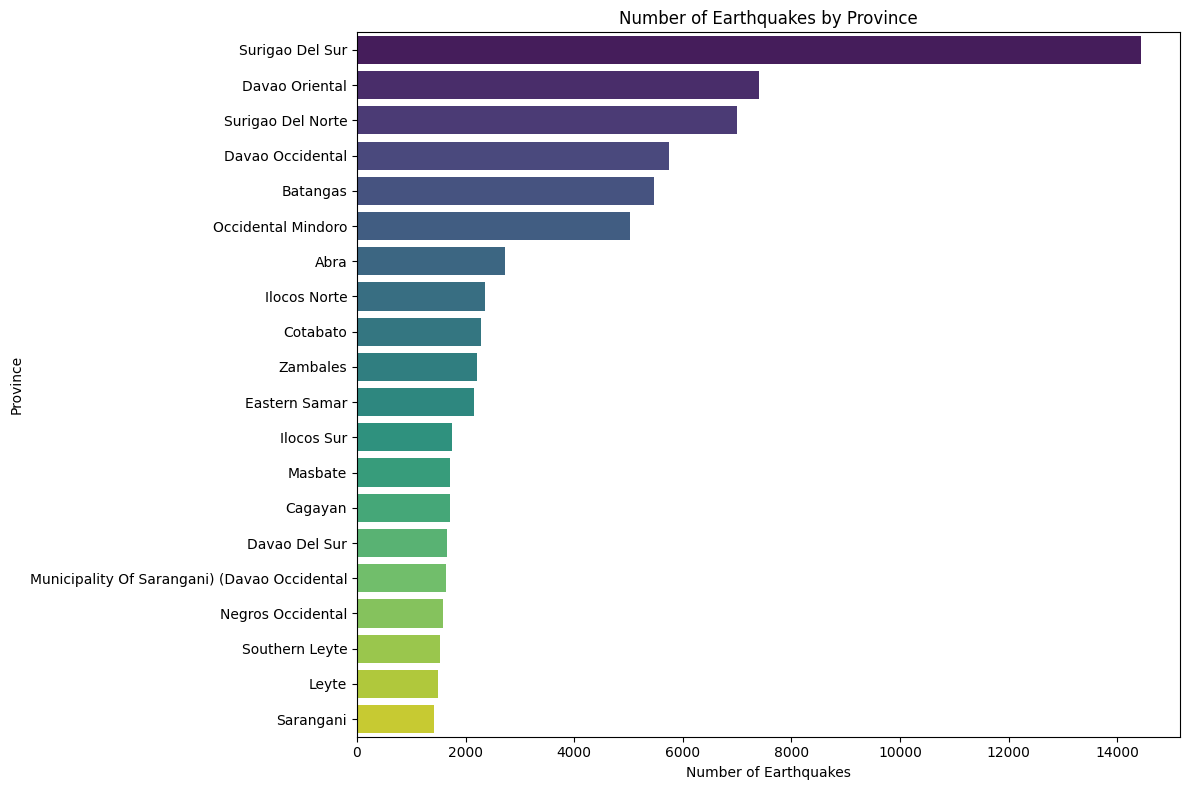

In [ ]:
# Visualizing the top 20 places of earthquakes occuring on each province
# Count earthquakes per Province
eq_counts = eq['Province'].value_counts().reset_index()
eq_counts.columns = ['Province', 'Count']
eq_top20 = eq_counts.head(20)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=eq_top20, x='Count', y='Province', palette='viridis')
plt.title('Number of Earthquakes by Province')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

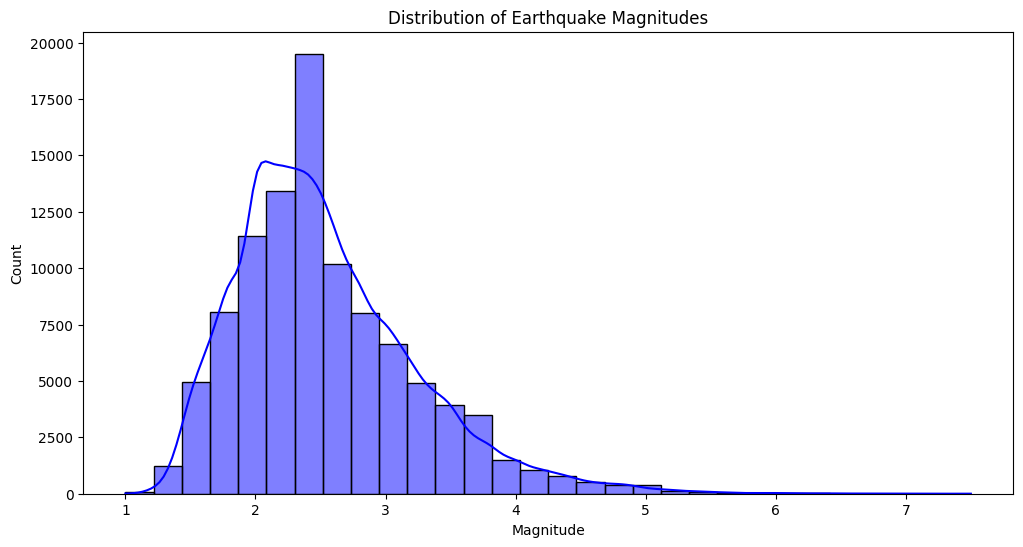

In [22]:
# Plotting the distribution of earthquakes by magnitude
plt.figure(figsize=(12, 6))
sns.histplot(eq['Magnitude'], bins=30, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitudes') 
plt.show()


Text(0.5, 0, 'Depth (in km)')

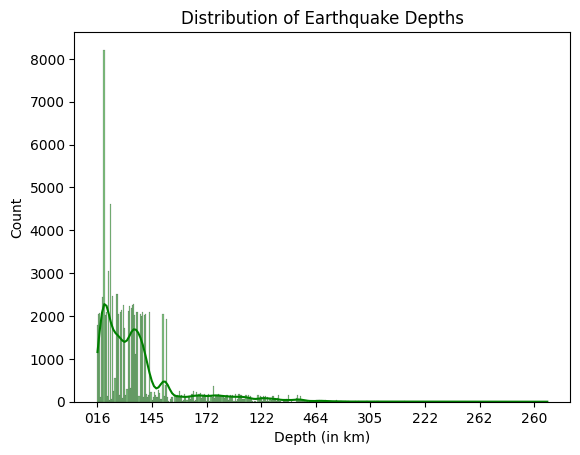

In [32]:
# Plotting the distribution of earthquakes by depth
from matplotlib.ticker import MaxNLocator

ax = sns.histplot(eq['Depth_In_Km'], bins=20, kde=True, color='green')
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))  # max 10 ticks
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (in km)')

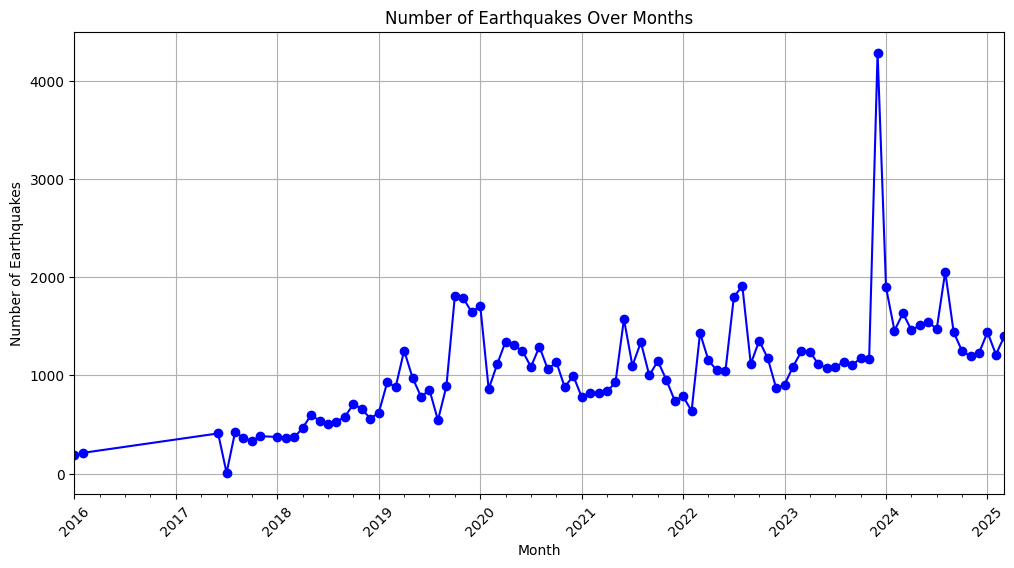

In [50]:
# Plotting the time series of earthquakes
# Ensure 'Date_Time_PH' is in datetime format
eq['Date_Time_PH'] = pd.to_datetime(eq['Date_Time_PH'])

# Group the data by month
eq['Month'] = eq['Date_Time_PH'].dt.to_period('M')
earthquake_counts = eq.groupby('Month').size()

# Plot the time series of earthquake counts over months
plt.figure(figsize=(12, 6))
earthquake_counts.plot(kind='line', color='blue', marker='o')
plt.title('Number of Earthquakes Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Map Visualization

In [56]:
#library for plotting maps
import folium
from IPython.display import display
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import gaussian_kde
import numpy as np

In [42]:
#convert latitude and longitude to numeric values
eq['Latitude'] = pd.to_numeric(eq['Latitude'], errors='coerce')
eq['Longitude'] = pd.to_numeric(eq['Longitude'], errors='coerce')

#remove rows with NaN values in Latitude and Longitude columns
eq.dropna(subset=['Latitude', 'Longitude'], inplace=True)


In [53]:
# Coordinates for the Philippines to make sure it is focused on our country
philippines_center = [12.8797, 121.7740]

# Create a base map centered on the Philippines
earthquake_map = folium.Map(location=philippines_center, zoom_start=6)

# Create a simple drill-down with HTML content in the popup
for _, row in eq.iterrows():
    # Create a drill-down popup with HTML content for City and Province
    popup_text = f"""
    <b>Earthquake Details:</b><br>
    <b>City:</b> {row['City']}<br>
    <b>Province:</b> {row['Province']}<br>
    <b>Magnitude:</b> {row['Magnitude']}<br>
    <b>Depth:</b> {row['Depth_In_Km']} km
    """
    
    # Add a circle marker with the popup
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=folium.Popup(popup_text, max_width=300)  # Use folium.Popup for better control
    ).add_to(earthquake_map)

# Adjust the display size
earthquake_map._repr_html_ = lambda: earthquake_map._repr_html_().replace('height: 500px', 'height: 600px')

# Display the map
earthquake_map


RecursionError: maximum recursion depth exceeded

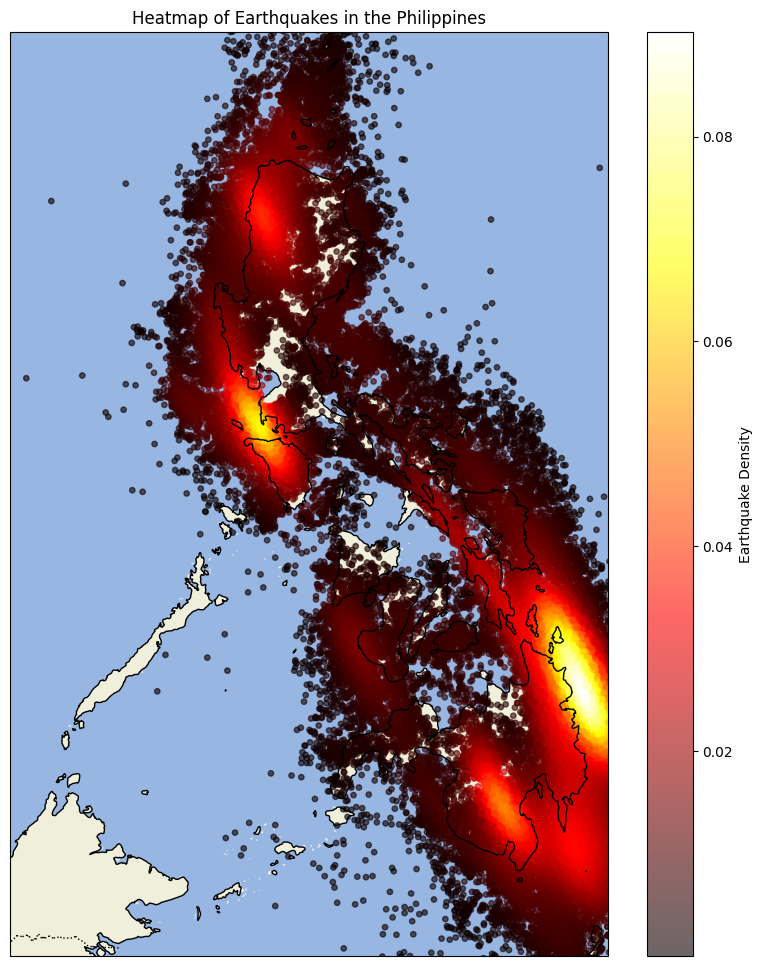

In [59]:
# Create arrays of latitude and longitude
lats = eq['Latitude'].astype(float).values
lons = eq['Longitude'].astype(float).values

# Create kernel density estimation for smooth heatmap
# Kernel Density Estimation (KDE) is used to estimate the probability density function of a random variable
xy = np.vstack([lons, lats])
z = gaussian_kde(xy)(xy)

# Plot
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set extent to the Philippines
ax.set_extent([116, 127, 4, 21], crs=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Create scatter plot colored by density
sc = ax.scatter(lons, lats, c=z, s=15, cmap='hot', alpha=0.6, transform=ccrs.PlateCarree())

# Colorbar and title
plt.colorbar(sc, label='Earthquake Density')
plt.title('Heatmap of Earthquakes in the Philippines')
plt.show()

## Clustering

In [73]:
# Libraries
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn import metrics
import geopandas as gpd
from libpysal.weights import Queen
from sklearn.cluster import OPTICS
from scipy.stats import zscore

In [61]:
# check for non-numeric values in the dataset
eq[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']].apply(pd.to_numeric, errors='coerce').isna().sum()


Latitude       0
Longitude      0
Magnitude      0
Depth_In_Km    3
dtype: int64

In [66]:
# Inspect the rows with non-numeric values
invalid_depths = eq[eq['Depth_In_Km'].apply(pd.to_numeric, errors='coerce').isna()]
print(invalid_depths[['Depth_In_Km']])

      Depth_In_Km
9593         <001
17113          --
65963           -


In [67]:
# Replace the invalid entries with NaN
eq['Depth_In_Km'] = eq['Depth_In_Km'].replace(['<001', '--', '-'], pd.NA)

# Convert to numeric (this will turn non-numeric values into NaN)
eq['Depth_In_Km'] = pd.to_numeric(eq['Depth_In_Km'], errors='coerce')

In [69]:
# Drop rows with NaN in the 'Depth_In_Km' column
eq = eq.dropna(subset=['Depth_In_Km'])

In [70]:
# Apply standardization to the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
eq_scaled = scaler.fit_transform(eq[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']])

In [71]:
# Create a dataframe for the original data 
eq_og = eq[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']].copy()

# Create a dataframe for the scaled data
eq_scaled = eq[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']].copy()

#### KMeans Clustering

In [83]:
# Apply KMeans on the original data
kmeans_og = KMeans(n_clusters=3, random_state=0)
eq_og['KMeans_Cluster'] = kmeans_og.fit_predict(eq_og)

# Evaluate the clustering performance using silhouette score
kmeans_silhouette = silhouette_score(eq_og, eq_og['KMeans_Cluster'])
print(f"KMeans Silhouette Score: {kmeans_silhouette:.6f}")

KMeans Silhouette Score: 0.718284


In [84]:
# Apply KMeans on the scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=0)
eq_scaled['KMeans_Cluster'] = kmeans_scaled.fit_predict(eq_scaled)

# Evaluate the clustering performance using silhouette score
kmeans_silhouette_scaled = silhouette_score(eq_scaled, eq_scaled['KMeans_Cluster'])
print(f"KMeans Silhouette Score: {kmeans_silhouette_scaled:.6f}")

KMeans Silhouette Score: 0.797366


In [89]:
# Hyperparameter tuning for KMeans
best_score = -1
best_params = {}

for k in range(2, 11, 2):  # Testing k from 2 to 10 with a step of 2
    for seed in [0, 10, 42, 99]:
        kmeans = KMeans(n_clusters=k, random_state=seed)
        labels = kmeans.fit_predict(eq_scaled)
        score = silhouette_score(eq_scaled, labels)
        if score > best_score:
            best_score = score
            best_params = {
                'n_clusters': k,
                'random_state': seed,
                'silhouette_score': score
            }

print("Best Parameters:")
print(best_params)

Best Parameters:
{'n_clusters': 2, 'random_state': 99, 'silhouette_score': 0.816559381781452}


#### DBSCAN

In [85]:
# Apply DBSCAN on the original data
dbscan_og = DBSCAN(eps=0.5, min_samples=5)
eq_og['DBSCAN_Cluster'] = dbscan_og.fit_predict(eq_og[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']])

# Evaluate the clustering performance using silhouette score
dbscan_silhouette_og = silhouette_score(eq_og[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']], eq_og['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score (Original Data): {dbscan_silhouette_og:.6f}")


DBSCAN Silhouette Score (Original Data): -0.306524


In [ ]:
# Apply DBSCAN on the scaled data
dbscan_scaled = DBSCAN(eps=0.5, min_samples=5)
eq_scaled['DBSCAN_Cluster'] = dbscan_scaled.fit_predict(eq_scaled[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']])

# Evaluate the clustering performance using silhouette score
dbscan_silhouette_scaled = silhouette_score(eq_scaled[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']], eq_scaled['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score (Scaled Data): {dbscan_silhouette_scaled:.6f}")

DBSCAN Silhouette Score (Scaled Data): -0.31


In [ ]:
# Hyperparameter tuning for DBSCAN
best_score = -1
best_params = {}

eps_values = np.arange(0.1, 5.0, 0.1)
min_samples_values = range(3, 10)

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(eq_scaled)

        # Check if there are at least 2 clusters (excluding noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters >= 2:
            score = silhouette_score(eq_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'silhouette_score': score
                }

print("Best Parameters:")
print(best_params)

#### OPTICS

In [81]:
# Apply OPTICS on the original data
optics_og = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
eq_og['OPTICS_Cluster'] = optics_og.fit_predict(eq_og[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']])

# Evaluate the clustering performance using silhouette score
optics_silhouette_og = silhouette_score(eq_og[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']], eq_og['OPTICS_Cluster'])
print(f"OPTICS Silhouette Score (Original Data): {optics_silhouette_og:.6f}")

c:\Users\MEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS Silhouette Score (Original Data): -0.06


In [82]:
# Apply OPTICS on the scaled data
optics_scaled = OPTICS(min_samples=5)
eq_scaled['OPTICS_Cluster'] = optics_scaled.fit_predict(eq_scaled[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']])

# Evaluate using Silhouette Score
optics_silhouette_scaled = silhouette_score(eq_scaled[['Latitude', 'Longitude', 'Magnitude', 'Depth_In_Km']], eq_scaled['OPTICS_Cluster'])
print(f"OPTICS Silhouette Score (Scaled Data): {optics_silhouette_scaled:.6f}")

c:\Users\MEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS Silhouette Score (Scaled Data): -0.436879


#### Getis-Ord Gi*

In [86]:
# This will require spatial weight matrices and might need additional libraries
from pysal.model import spreg
import geopandas as gpd
from shapely.geometry import Point
from libpysal.weights import KNN
from esda import G_Local

In [88]:
# Original data GeoDataFrame
eq_og['geometry'] = eq_og.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf_og = gpd.GeoDataFrame(eq_og, geometry='geometry')

# KNN weights for original data
w_og = KNN.from_dataframe(gdf_og, k=8)

# Compute Getis-Ord Gi*
gi_og = G_Local(gdf_og['Magnitude'], w_og)
gdf_og['Gi_Star'] = gi_og.Zs  # Z-scores

c:\Users\MEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 164 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


OSError: [WinError 1450] Insufficient system resources exist to complete the requested service

In [ ]:
# Scaled data GeoDataFrame
eq_scaled['geometry'] = eq_scaled.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf_scaled = gpd.GeoDataFrame(eq_scaled, geometry='geometry')

# KNN weights for scaled data
w_scaled = KNN.from_dataframe(gdf_scaled, k=8)
gi_scaled = G_Local(gdf_scaled['Magnitude'], w_scaled)
gdf_scaled['Gi_Star'] = gi_scaled.Zs

##### Interpretation of Results for Getis-Ord Gi*
* <b>High positive values</b> = Hotspots (high magnitude surrounded by high values)
* <b>High negative Values</b> = Coldspots (low magnitude surrounded by low values)
* <b>Near-zero</b> = No significant spatial clustering

#### Anselin Local Moran's I 
Applied for spatial autocorrelation

In [90]:
from pysal.lib import weights
from pysal.explore import esda

# Generate spatial weights (e.g., Queen contiguity)
w = weights.Queen.from_dataframe(eq)

# Calculate Moran's I
local_moran = esda.Moran_Local(eq['Magnitude'], w)

# Add the Local Moran's I results to the dataframe
eq['Local_Moran_I'] = local_moran.Is

c:\Users\MEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
c:\Users\MEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'DataFrame' object has no attribute 'geometry'

### Comparison of Silhouette Scores

In [ ]:
scores = {
    "KMeans": kmeans_silhouette,
    "DBSCAN": dbscan_silhouette,
    "OPTICS": optics_silhouette
}

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="viridis")
plt.title("Clustering Silhouette Scores")
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.show()

### Map